Ги вчитуваме потребните библиотеки

In [816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [817]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [818]:
data = pd.read_csv('/content/drive/MyDrive/ProektVNP/ProektVNP_dataset.csv')

Проверуваме дали имаме null вредности

In [819]:
data.isnull().sum()

Country           0
Year              0
Month             0
Food Item         0
Measurement       0
Average Price     0
Currency          0
dtype: int64

In [820]:
data

,Country,Year,Month,Food Item,Measurement,Average Price,Currency
0,Canada,2018,1,Bread,Loaf,2.82,CAD
1,Canada,2018,2,Bread,Loaf,2.75,CAD
2,Canada,2018,3,Bread,Loaf,2.72,CAD
3,Canada,2018,4,Bread,Loaf,2.73,CAD
4,Canada,2018,5,Bread,Loaf,2.79,CAD
...,...,...,...,...,...,...,...
571,Canada,2021,8,Mushrooms,1 Kg,9.79,CAD
572,Canada,2021,9,Mushrooms,1 Kg,9.68,CAD
573,Canada,2021,10,Mushrooms,1 Kg,9.43,CAD
574,Canada,2021,11,Mushrooms,1 Kg,9.74,CAD


In [821]:
data.columns

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Measurement',
       'Average Price ', 'Currency '],
      dtype='object')

In [822]:
data['Food Item '].nunique()

12

**Имаме 12 производи**

In [823]:
data_plt = data.copy()

Правиме визуелизација на податоците

In [824]:
import matplotlib.pyplot as plt

Колоните за година и месец ги спојуваме во година-месец формат, за подобра визуелизација.

In [825]:
data["Date"] = pd.to_datetime(data["Year "].astype(str) + '/' + data["Month "].astype(str).str.zfill(2)).dt.strftime('%Y-%m')

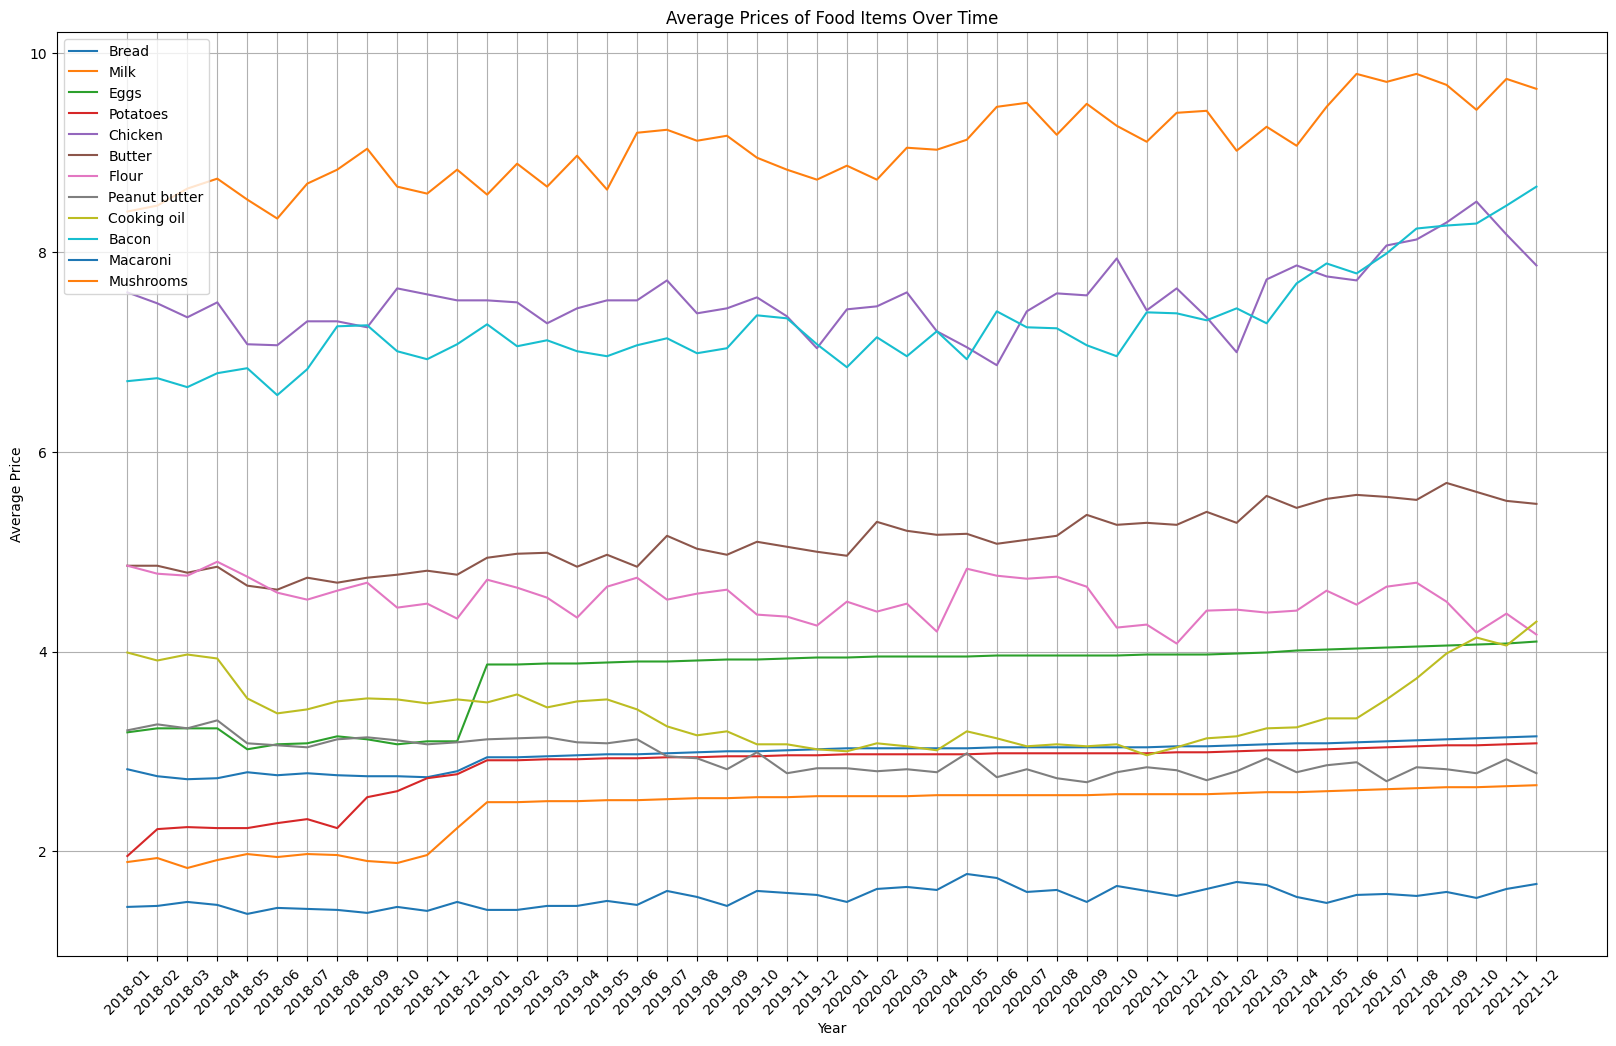

In [826]:
food_items = data['Food Item '].unique()

plt.figure(figsize=(20, 12))

for food_item in food_items:
    food_data = data[data['Food Item '] == food_item]
    plt.plot(food_data['Date'], food_data['Average Price '], label=food_item)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Food Items Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

Гледаме дека цените на скоро сите прозводи се зголемени во периодот од 4 години.

##LSTM

In [872]:
data1 = data.copy()

In [873]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [874]:
le = LabelEncoder()

Ги енкодираме вредностите за производите

In [875]:
data1['Food Item '] = le.fit_transform(data1['Food Item '])

In [876]:
data1

,Country,Year,Month,Food Item,Measurement,Average Price,Currency,Date
0,Canada,2018,1,1,Loaf,2.82,CAD,2018-01
1,Canada,2018,2,1,Loaf,2.75,CAD,2018-02
2,Canada,2018,3,1,Loaf,2.72,CAD,2018-03
3,Canada,2018,4,1,Loaf,2.73,CAD,2018-04
4,Canada,2018,5,1,Loaf,2.79,CAD,2018-05
...,...,...,...,...,...,...,...,...
571,Canada,2021,8,9,1 Kg,9.79,CAD,2021-08
572,Canada,2021,9,9,1 Kg,9.68,CAD,2021-09
573,Canada,2021,10,9,1 Kg,9.43,CAD,2021-10
574,Canada,2021,11,9,1 Kg,9.74,CAD,2021-11


Правиме drop на непотребните колони.

In [877]:
data1 = data1.drop('Country ', axis=1)
data1 = data1.drop('Date', axis=1)
data1 = data1.drop('Measurement', axis=1)
data1 = data1.drop('Currency ', axis=1)

In [878]:
data1

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [879]:
data1['Food Item '].unique()

array([ 1,  8,  5, 11,  3,  2,  6, 10,  4,  0,  7,  9])

In [880]:
x = data1.drop('Average Price ', axis=1)
y = data1.iloc[:, -1:]

In [881]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [882]:
scaler = StandardScaler()

In [883]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [884]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [885]:
X_train.shape

(460, 3)

In [886]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [887]:
X_train.shape

(460, 1, 3)

In [888]:
model = Sequential()

model.add(LSTM(80, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [889]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [890]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=500, batch_size=16)

Epoch 1/500
23/23 [==============================] - 5s 27ms/step - loss: 25.4655 - mean_absolute_error: 4.4999 - val_loss: 23.1010 - val_mean_absolute_error: 4.2364
Epoch 2/500
23/23 [==============================] - 0s 7ms/step - loss: 24.3572 - mean_absolute_error: 4.3744 - val_loss: 21.5804 - val_mean_absolute_error: 4.0581
Epoch 3/500
23/23 [==============================] - 0s 6ms/step - loss: 21.8756 - mean_absolute_error: 4.0786 - val_loss: 17.9694 - val_mean_absolute_error: 3.6054
Epoch 4/500
23/23 [==============================] - 0s 7ms/step - loss: 16.1783 - mean_absolute_error: 3.2942 - val_loss: 10.3889 - val_mean_absolute_error: 2.4317
Epoch 5/500
23/23 [==============================] - 0s 9ms/step - loss: 8.1027 - mean_absolute_error: 2.1029 - val_loss: 4.7258 - val_mean_absolute_error: 1.4874
Epoch 6/500
23/23 [==============================] - 0s 7ms/step - loss: 5.8495 - mean_absolute_error: 1.8649 - val_loss: 4.7901 - val_mean_absolute_error: 1.5305
Epoch 7/500
2

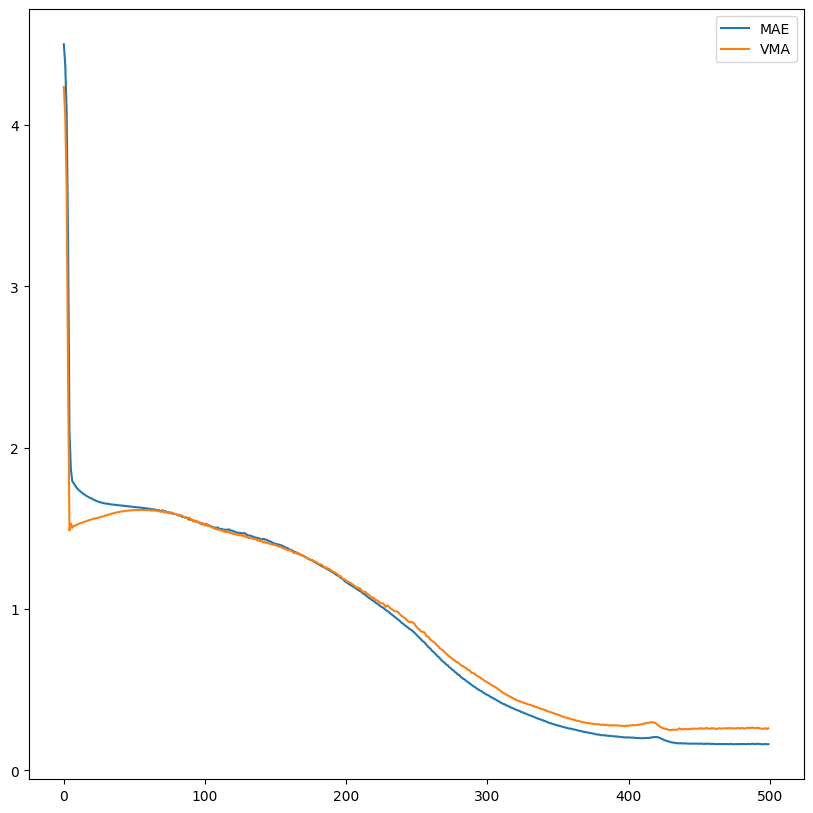

In [891]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'], label='MAE')
plt.plot(history.history['val_mean_absolute_error'], label='VMA')
plt.legend()

In [892]:
y_pred = model.predict(X_test)

4/4 [==============================] - 1s 8ms/step


In [893]:
r2_score(Y_test,y_pred)

0.9796554879923676

##Linear Regression

In [946]:
data2 = data.copy()

In [947]:
from sklearn.linear_model import LinearRegression

In [948]:
model = LinearRegression()

In [949]:
data2['Food Item '] = le.fit_transform(data2['Food Item '])

In [950]:
data2 = data2.drop('Country ', axis=1)
data2 = data2.drop('Measurement', axis=1)
data2 = data2.drop('Currency ', axis=1)
data2 = data2.drop('Date', axis=1)

In [951]:
data2

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [952]:
x = data2.iloc[:, 0:-1]
y = data2.iloc[:, -1:]

In [953]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [954]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [955]:
model.fit(X_train, Y_train)

LinearRegression()

In [956]:
pred = model.predict(X_test)

In [957]:
r2_score(Y_test,pred)

0.01639506188394635

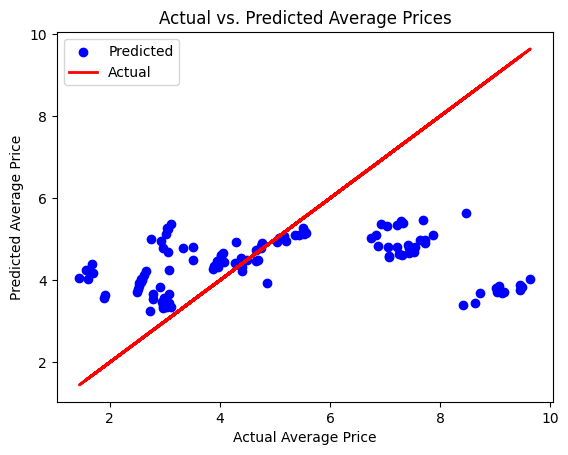

In [959]:
plt.scatter(Y_test, pred, color='blue', label='Predicted')
plt.plot(Y_test, Y_test, color='red', linewidth=2, label='Actual')

plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual vs. Predicted Average Prices')
plt.legend()
plt.show()

##CatBoost

In [924]:
data3 = data.copy()

In [862]:
!pip install catboost

In [925]:
data3 = data3.drop('Country ', axis=1)
data3 = data3.drop('Date', axis=1)
data3 = data3.drop('Measurement', axis=1)
data3 = data3.drop('Currency ', axis=1)

In [926]:
data3['Food Item '] = le.fit_transform(data3['Food Item '])

In [927]:
from catboost import CatBoostRegressor

In [928]:
data3

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [929]:
x = data3.iloc[:, :-1]
y = data3.iloc[:, -1:]

In [930]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [931]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [932]:
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE')

In [933]:
model.fit(X_train, Y_train)

Learning rate set to 0.036216
0:	learn: 2.1784481	total: 406us	remaining: 406ms
1:	learn: 2.1541541	total: 666us	remaining: 332ms
2:	learn: 2.1064233	total: 1.61ms	remaining: 537ms
3:	learn: 2.0821330	total: 3.9ms	remaining: 971ms
4:	learn: 2.0268982	total: 4.68ms	remaining: 932ms
5:	learn: 1.9841216	total: 5.32ms	remaining: 881ms
6:	learn: 1.9507061	total: 5.8ms	remaining: 822ms
7:	learn: 1.9070027	total: 6.29ms	remaining: 780ms
8:	learn: 1.8599723	total: 6.78ms	remaining: 746ms
9:	learn: 1.8175788	total: 7.26ms	remaining: 719ms
10:	learn: 1.7695954	total: 7.69ms	remaining: 691ms
11:	learn: 1.7284474	total: 8.25ms	remaining: 680ms
12:	learn: 1.6956548	total: 8.93ms	remaining: 678ms
13:	learn: 1.6525381	total: 9.63ms	remaining: 679ms
14:	learn: 1.6111058	total: 10.1ms	remaining: 665ms
15:	learn: 1.5792484	total: 10.6ms	remaining: 653ms
16:	learn: 1.5686281	total: 11.1ms	remaining: 643ms
17:	learn: 1.5270553	total: 11.6ms	remaining: 634ms
18:	learn: 1.5122743	total: 12.1ms	remaining: 62

In [934]:
y_pred = model.predict(X_test)

In [935]:
r2_score(Y_test, y_pred)

0.9960672683709976